In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import timeit
import zipfile
from numpy import genfromtxt
import pandas as pd
import seaborn as sns

In [2]:
from lolopy.learners import RandomForestClassifier as loloClassifier # lolopy Random forest
from sklearn.ensemble import RandomForestClassifier # scikit learn Random Forest
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
cdir = os.getcwd()
print(cdir)
zip_dir = '/home/vazumah/AIML24787-Project/'
os.chdir(zip_dir)

/home/vazumah/AIML24787-Project


In [4]:
with zipfile.ZipFile('ML_Final_Project_Data.zip', 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

In [5]:
def nucleotide_pore_data(name='mxene'):
    
    # load adenosine dataset
    A_x = genfromtxt(f'./ML Final Project Data/a_{name}.csv',delimiter=',')
    A_x_clean = A_x[1:, 1:]
    A_y = np.zeros([A_x_clean.shape[0],1])
    A_x_p= np.zeros([A_x_clean.shape[0],1])  # 'Purine'
    
    # load cytosine dataset
    C_x = genfromtxt(f'./ML Final Project Data/c_{name}.csv',delimiter=',')
    C_x_clean = C_x[1:, 1:]
    C_y = np.ones([C_x_clean.shape[0],1])
    C_x_p= np.ones([C_x_clean.shape[0],1]) #'Pyrimidine'
    
    # load guanine dataset
    G_x = genfromtxt(f'./ML Final Project Data/g_{name}.csv',delimiter=',')
    G_x_clean = G_x[1:, 1:]
    G_y = np.zeros([G_x_clean.shape[0],1])
    G_y[:]= 2
    G_x_p= np.zeros([G_x_clean.shape[0],1]) #'Purine'
    
    #load thyiamine dataset
    T_x = genfromtxt(f'./ML Final Project Data/t_{name}.csv',delimiter=',')
    T_x_clean = T_x[1:, 1:]
    T_y = np.zeros([T_x_clean.shape[0],1])
    T_y[:] = 3
    T_x_p= np.ones([T_x_clean.shape[0],1]) #'Pyrimidine'
    
    X = np.concatenate((A_x_clean, C_x_clean,G_x_clean,T_x_clean), axis=0)
    y = np.concatenate((A_y, C_y,G_y,T_y), axis=0)
    dna_class = np.concatenate((A_x_p, C_x_p,G_x_p,T_x_p), axis=0)
    Xeng = np.concatenate((X,dna_class), axis=1)
    
    return X, y, dna_class, Xeng
    

Sys.setenv(JAVA_HOME="/home/vazumah/anaconda3/envs/NAME")

In [6]:
!(echo $JAVA_HOME)

In [7]:
def training_and_plots(X,y, mode='regular', name='mxene'):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size =  0.3, random_state=300)
    
    decTree = tree.DecisionTreeClassifier()
    decTree = decTree.fit(X_train, y_train)
    decTree_res_pred = decTree.predict(X_test)
    decTree_score = accuracy_score(y_test, decTree_res_pred)
    
    sRanFor = RandomForestClassifier(criterion='entropy')
    sRanFor = sRanFor.fit(X_train, y_train.flatten())
    sRanFor_res_pred = sRanFor.predict(X_test)
    sRanFor_score = accuracy_score(y_test, sRanFor_res_pred)
    
    lRanFor = loloClassifier()
    lRanFor = lRanFor.fit(X_train, y_train.flatten())
    lRanFor_res_pred = lRanFor.predict(X_test)
    lRanFor_score = accuracy_score(y_test, lRanFor_res_pred)
    
    # Dec tree score per base
    if mode=='binary':
        Purine_score_dec = accuracy_score(y_test[y_test==0], decTree_res_pred.reshape(-1,1)[y_test==0])
        Pyrimidine_score_dec = accuracy_score(y_test[y_test==1], decTree_res_pred.reshape(-1,1)[y_test==1])
        
        Purine_score_sF = accuracy_score(y_test[y_test==0], sRanFor_res_pred.reshape(-1,1)[y_test==0])
        Pyrimidine_score_sF = accuracy_score(y_test[y_test==1], sRanFor_res_pred.reshape(-1,1)[y_test==1])
        
        Purine_score_lF = accuracy_score(y_test[y_test==0], lRanFor_res_pred.reshape(-1,1)[y_test==0])
        Pyrimidine_score_lF = accuracy_score(y_test[y_test==1], lRanFor_res_pred.reshape(-1,1)[y_test==1])
        
        groups = ['Decision Tree', 'Sk Random Forest', 'Lolopy Random Forest']
        totals_p = [decTree_score, sRanFor_score,lRanFor_score]
        Purine_scores = [Purine_score_dec,Purine_score_sF,Purine_score_lF]
        Pyrimidine_scores = [Pyrimidine_score_dec,Pyrimidine_score_sF,Pyrimidine_score_lF]


        group_dic = {'Models':[*groups[:], *groups[:], *groups[:]],
                    'Scores':[*totals_p[:], *Purine_scores[:], *Pyrimidine_scores[:]],
                    'Classes': ['Totals','Totals','Totals',
                                'Purine','Purine','Purine','Pyrimidine','Pyrimidine','Pyrimidine']}

        group_list = [dict(zip(group_dic,t)) for t in zip(*group_dic.values())]

    else:
        A_score_dec = accuracy_score(y_test[y_test==0], decTree_res_pred.reshape(-1,1)[y_test==0])
        C_score_dec = accuracy_score(y_test[y_test==1], decTree_res_pred.reshape(-1,1)[y_test==1])
        G_score_dec = accuracy_score(y_test[y_test==2], decTree_res_pred.reshape(-1,1)[y_test==2])
        T_score_dec = accuracy_score(y_test[y_test==3], decTree_res_pred.reshape(-1,1)[y_test==3])
        
        A_score_sF = accuracy_score(y_test[y_test==0], sRanFor_res_pred.reshape(-1,1)[y_test==0])
        C_score_sF = accuracy_score(y_test[y_test==1], sRanFor_res_pred.reshape(-1,1)[y_test==1])
        G_score_sF = accuracy_score(y_test[y_test==2], sRanFor_res_pred.reshape(-1,1)[y_test==2])
        T_score_sF = accuracy_score(y_test[y_test==3], sRanFor_res_pred.reshape(-1,1)[y_test==3])
        
        A_score_lF = accuracy_score(y_test[y_test==0], lRanFor_res_pred.reshape(-1,1)[y_test==0])
        C_score_lF = accuracy_score(y_test[y_test==1], lRanFor_res_pred.reshape(-1,1)[y_test==1])
        G_score_lF = accuracy_score(y_test[y_test==2], lRanFor_res_pred.reshape(-1,1)[y_test==2])
        T_score_lF = accuracy_score(y_test[y_test==3], lRanFor_res_pred.reshape(-1,1)[y_test==3])

        groups = ['Decision Tree', 'Sk Random Forest', 'Lolopy Random Forest']
        totals = [decTree_score, sRanFor_score,lRanFor_score]
        A_scores = [A_score_dec,A_score_sF,A_score_lF]
        C_scores = [C_score_dec,C_score_sF,C_score_lF]
        G_scores = [G_score_dec,G_score_sF,G_score_lF]
        T_scores = [T_score_dec,T_score_sF,T_score_lF]

        group_dic = {'Models':[*groups[:], *groups[:], *groups[:], *groups[:], *groups[:]],
                    'Scores':[*totals[:], *A_scores[:], *C_scores[:], *G_scores[:], *T_scores[:]],
                    'Classes': ['Totals','Totals','Totals',
                                'A','A','A','C','C','C',
                                'G','G','G','T','T', 'T']}

        group_list = [dict(zip(group_dic,t)) for t in zip(*group_dic.values())]
    
    
    group_df = pd.DataFrame(group_list)
    # pore_type = np.chararray([group_df.shape[0],1])
    # pore_type[:] = name
    pore_type = np.repeat(name, group_df.shape[0])
    group_df['pore_type'] = pore_type.tolist()
            
    return group_df
    

## Mxene Plots

In [8]:
Xxene, yxene, dna_xene, Xxeng = nucleotide_pore_data(name='mxene')

[Text(0.5, 1.0, 'Mxene Model Accuracy per Nucleotide')]

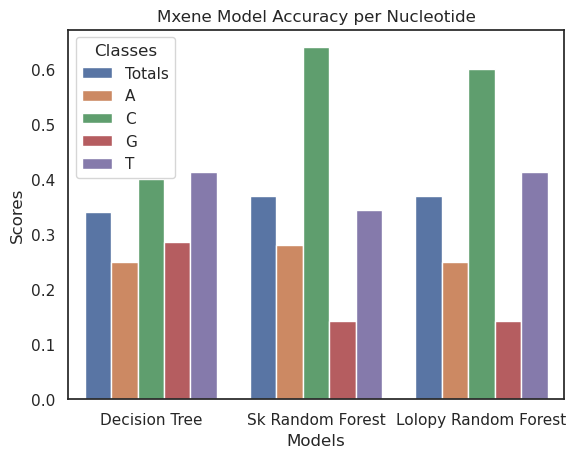

In [9]:
# Regular training
mxene_df = training_and_plots(Xxene,yxene)
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=mxene_df).set(title='Mxene Model Accuracy per Nucleotide') 


[Text(0.5, 1.0, 'Model Accuracy with Purine/Pyrimidine Type')]

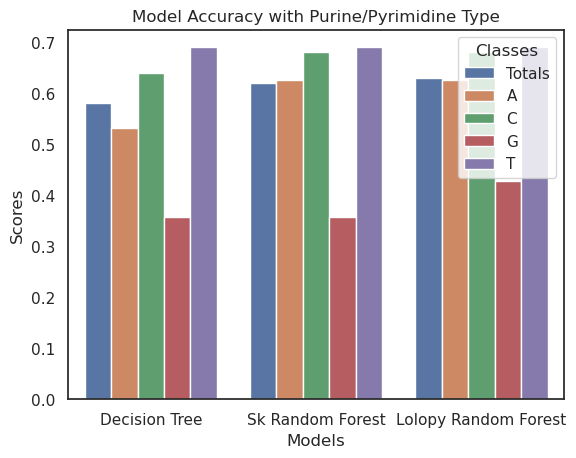

In [10]:
# training with purines and pyrimidines engineering
mxene_df_e = training_and_plots(Xxeng, yxene)
# group_df = pd.DataFrame.from_dict(group_dic)
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=mxene_df_e).set(title='Model Accuracy with Purine/Pyrimidine Type') 

[Text(0.5, 1.0, 'Binary Classification into Purine/Pyrimidine Type')]

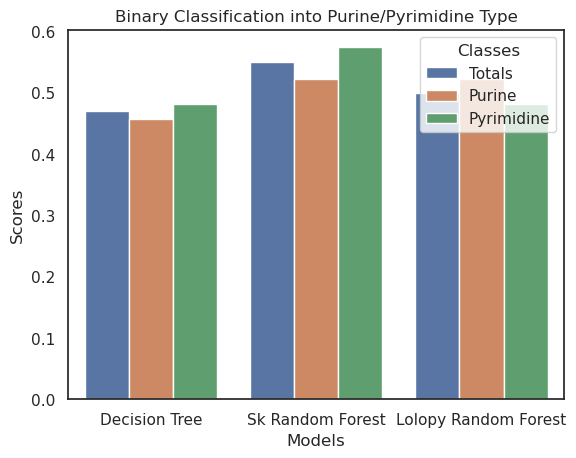

In [11]:
#classifying only purines and pyrimidines
mxene_df_p = training_and_plots(Xxene,dna_xene, mode='binary')
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=mxene_df_p).set(title='Binary Classification into Purine/Pyrimidine Type')

In [12]:
pores = ['gra', 'mos', 'phos']

In [13]:
my_vars = vars()

my_vars[f'X{pores[0]}'],my_vars[f'y{pores[0]}'],my_vars[f'dna_{pores[0]}'],my_vars[f'Xeng_{pores[0]}'] = 1,1,1,1

In [14]:
# Let's start for all pores
my_vars = vars()
for ind, pore in enumerate(pores):
    print(pore)
    my_vars[f'X{pore}'],my_vars[f'y{pore}'],my_vars[f'dna_{pore}'],my_vars[f'Xeng_{pore}'] = nucleotide_pore_data(name=pore)
    my_vars[f'{pore}_df'] = training_and_plots(my_vars[f'X{pore}'],my_vars[f'y{pore}'], name=pore)
    my_vars[f'{pore}_df_e'] = training_and_plots(my_vars[f'Xeng_{pore}'], my_vars[f'y{pore}'], name=pore)
    my_vars[f'{pore}_df_p'] = training_and_plots(my_vars[f'X{pore}'],my_vars[f'dna_{pore}'], mode='binary', name=pore)

gra
mos
phos


## Graphite Studies

[Text(0.5, 1.0, 'Graphite Model Accuracy per Nucleotide')]

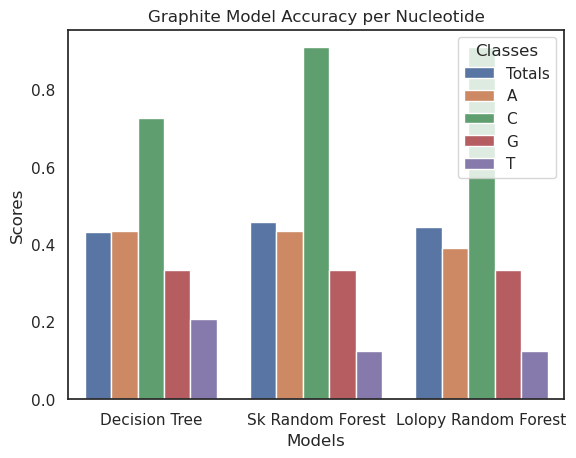

In [15]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=gra_df).set(title='Graphite Model Accuracy per Nucleotide') 


[Text(0.5, 1.0, 'Graphite Model Accuracy with Purine/Pyrimidine Type')]

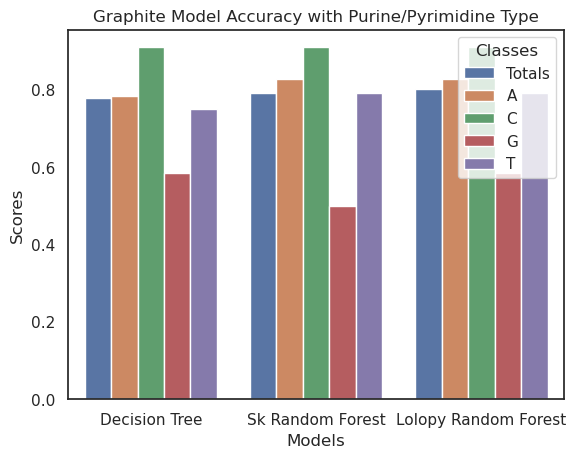

In [16]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=gra_df_e).set(title='Graphite Model Accuracy with Purine/Pyrimidine Type') 

[Text(0.5, 1.0, 'Graphite Binary Classification into Purine/Pyrimidine Type')]

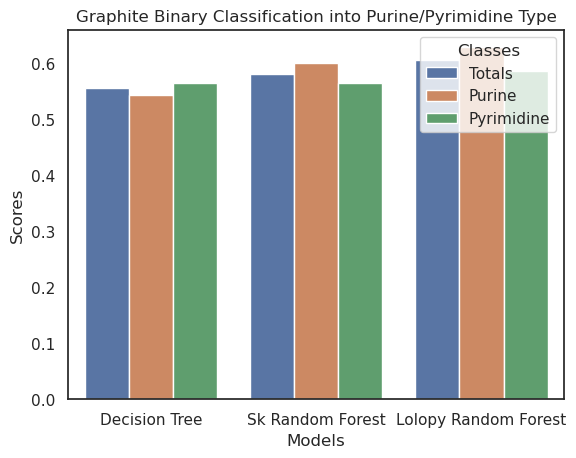

In [17]:
#classifying only purines and pyrimidines
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=gra_df_p).set(title='Graphite Binary Classification into Purine/Pyrimidine Type')

## MOS Studies

[Text(0.5, 1.0, 'MOS Model Accuracy per Nucleotide')]

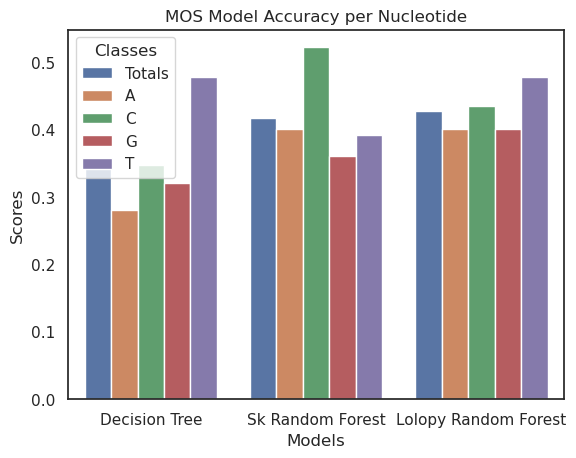

In [18]:

sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=mos_df).set(title='MOS Model Accuracy per Nucleotide') 


[Text(0.5, 1.0, 'MOS Model Accuracy with Purine/Pyrimidine Type')]

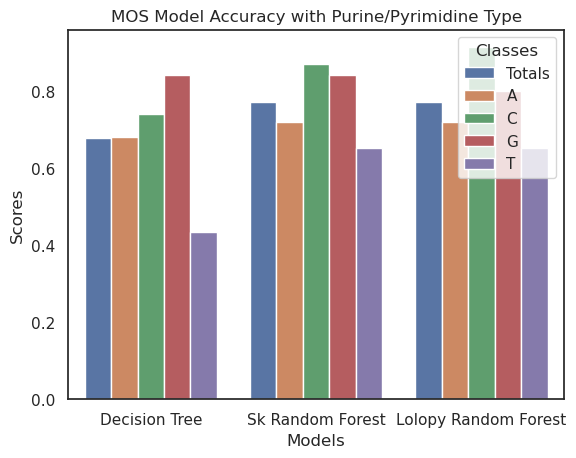

In [19]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=mos_df_e).set(title='MOS Model Accuracy with Purine/Pyrimidine Type') 

[Text(0.5, 1.0, 'MOS Binary Classification into Purine/Pyrimidine Type')]

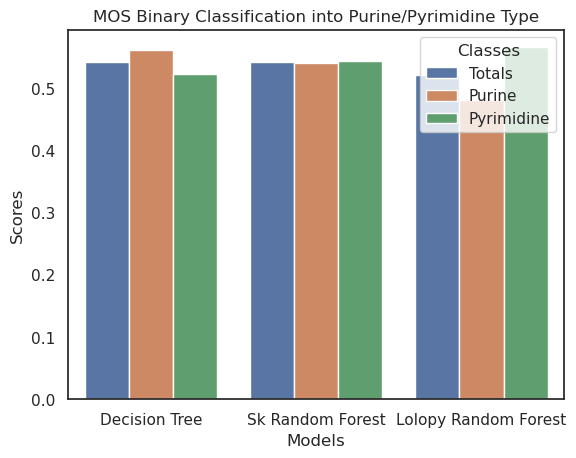

In [20]:
#classifying only purines and pyrimidines
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=mos_df_p).set(title='MOS Binary Classification into Purine/Pyrimidine Type')

## Phospherene studies

[Text(0.5, 1.0, 'Phospherene Model Accuracy per Nucleotide')]

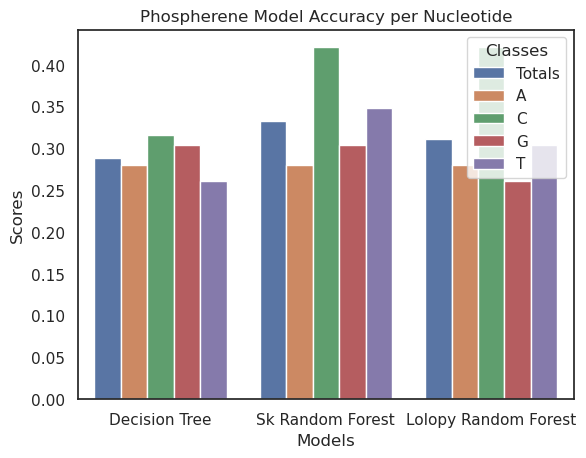

In [21]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=phos_df).set(title='Phospherene Model Accuracy per Nucleotide') 


[Text(0.5, 1.0, 'Phospherene Model Accuracy with Purine/Pyrimidine Type')]

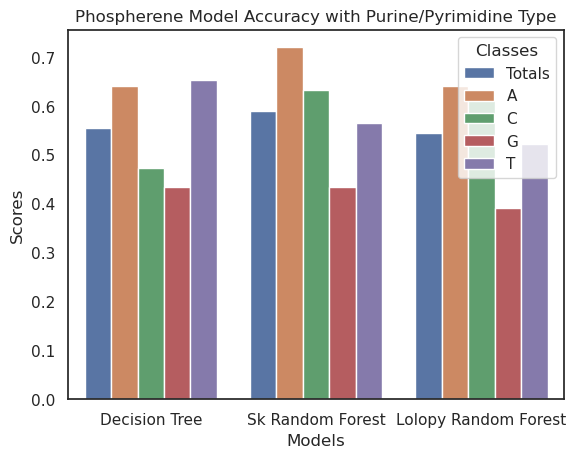

In [22]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=phos_df_e).set(title='Phospherene Model Accuracy with Purine/Pyrimidine Type') 
#classifying only purines and pyrimidines


[Text(0.5, 1.0, 'Phospherene Binary Classification into Purine/Pyrimidine Type')]

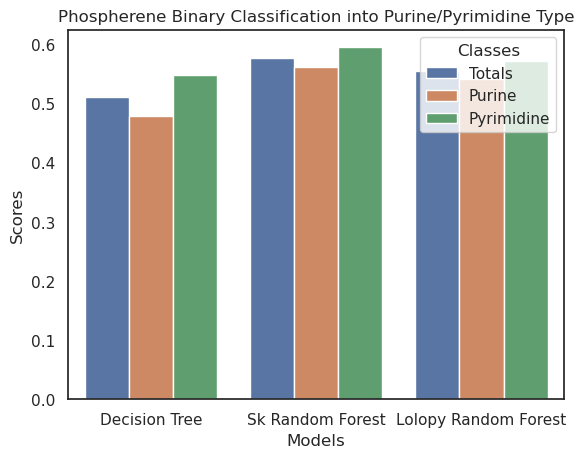

In [23]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=phos_df_p).set(title='Phospherene Binary Classification into Purine/Pyrimidine Type')

# Comparing entire Dataset

In [24]:
# all_data_df = mxene_df.append([gra_df, mos_df, phos_df], ignore_index=True)
all_data_df = pd.concat([mxene_df, gra_df, mos_df, phos_df], axis=0,ignore_index=True)
all_data_df_e = pd.concat([mxene_df_e, gra_df_e, mos_df_e, phos_df_e], axis=0,ignore_index=True)
# all_data_df_p = pd.concat([mxene_df_p, gra_df_p, mos_df_p, phos_df_p], axis=0,ignore_index=True)

## Across Totals

<class 'pandas.core.frame.DataFrame'>


[Text(0.5, 1.0, 'Total Accuracy across Pore Types')]

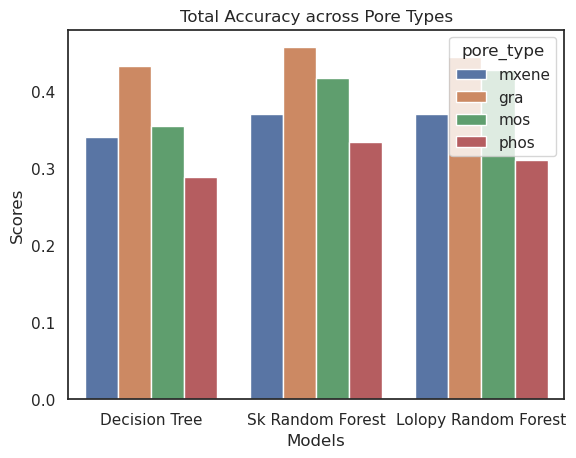

In [25]:
totals_pos =all_data_df.index[all_data_df['Classes']=='Totals'].tolist()
totals_df = all_data_df.iloc[totals_pos,:]
print(type(totals_df))
# All models accuracy
sns.set(style='white')

# #create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='pore_type', data=totals_df).set(title='Total Accuracy across Pore Types')

[Text(0.5, 1.0, 'Engineered Total Accuracy across Pore Types')]

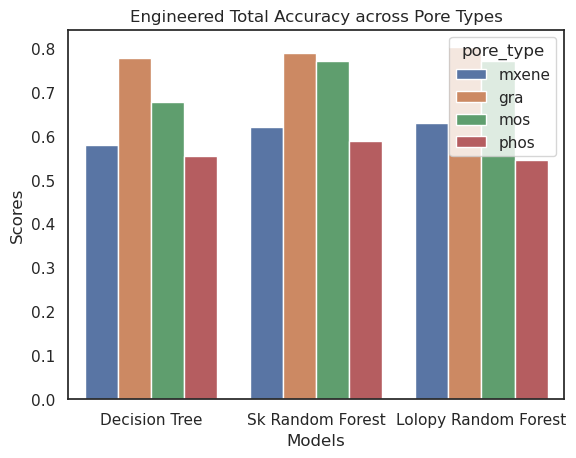

In [26]:
totals_pos_e =all_data_df_e.index[all_data_df_e['Classes']=='Totals'].tolist()
totals_df_e = all_data_df_e.iloc[totals_pos_e,:]
# All models accuracy
sns.set(style='white')

# #create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='pore_type', data=totals_df_e).set(title='Engineered Total Accuracy across Pore Types')

## Across A

[Text(0.5, 1.0, 'Adenine Accuracy across Pore Types')]

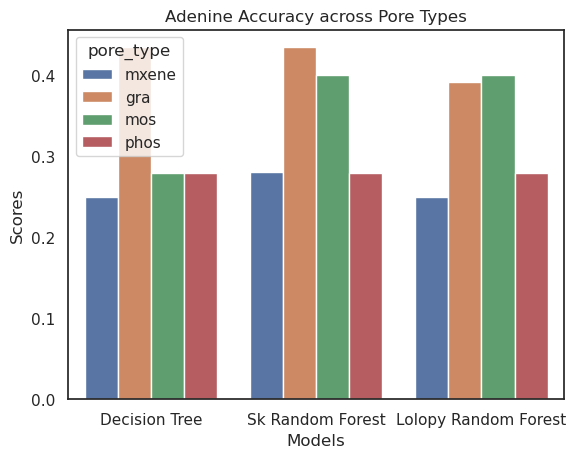

In [27]:
A_pos =all_data_df.index[all_data_df['Classes']=='A'].tolist()
A_df = all_data_df.iloc[A_pos,:]

# All models accuracy
sns.set(style='white')

# #create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='pore_type', data=A_df).set(title='Adenine Accuracy across Pore Types')

[Text(0.5, 1.0, 'Engineered Adenine Accuracy across Pore Types')]

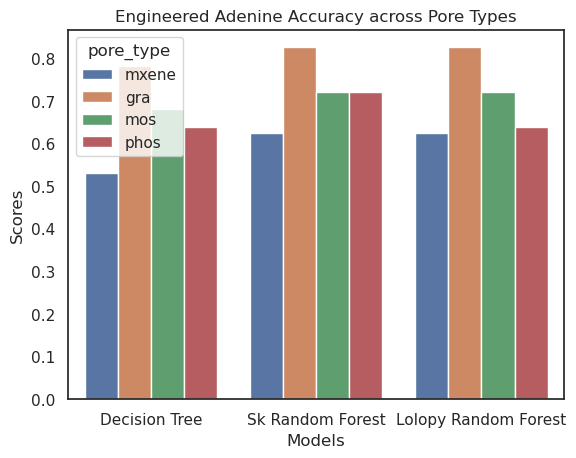

In [28]:
A_pos_e =all_data_df_e.index[all_data_df_e['Classes']=='A'].tolist()
A_df_e = all_data_df_e.iloc[A_pos_e,:]
# All models accuracy
sns.set(style='white')

# #create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='pore_type', data=A_df_e).set(title='Engineered Adenine Accuracy across Pore Types')

## Across C

[Text(0.5, 1.0, 'Cytosine Accuracy across Pore Types')]

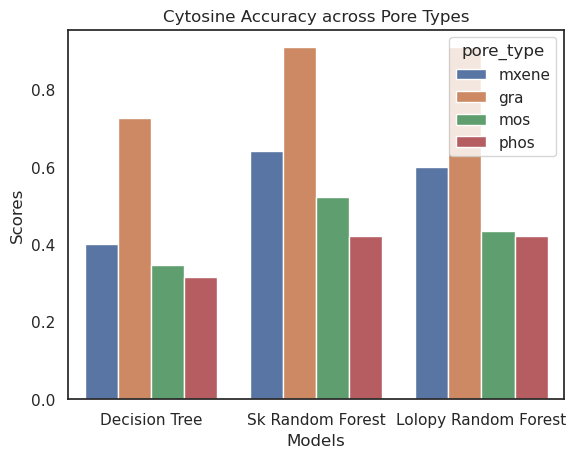

In [29]:
C_pos =all_data_df.index[all_data_df['Classes']=='C'].tolist()
C_df = all_data_df.iloc[C_pos,:]

# All models accuracy
sns.set(style='white')

# #create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='pore_type', data=C_df).set(title='Cytosine Accuracy across Pore Types')

[Text(0.5, 1.0, 'Engineered Cytosine Accuracy across Pore Types')]

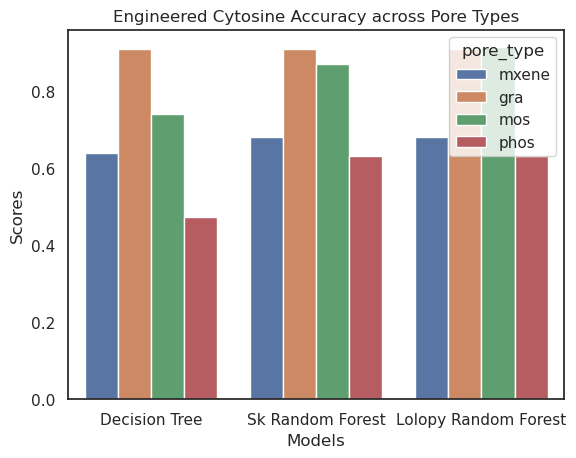

In [30]:
C_pos_e =all_data_df_e.index[all_data_df_e['Classes']=='C'].tolist()
C_df_e = all_data_df_e.iloc[C_pos_e,:]
# All models accuracy
sns.set(style='white')

# #create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='pore_type', data=C_df_e).set(title='Engineered Cytosine Accuracy across Pore Types')

## Across G

[Text(0.5, 1.0, 'Guanine Accuracy across Pore Types')]

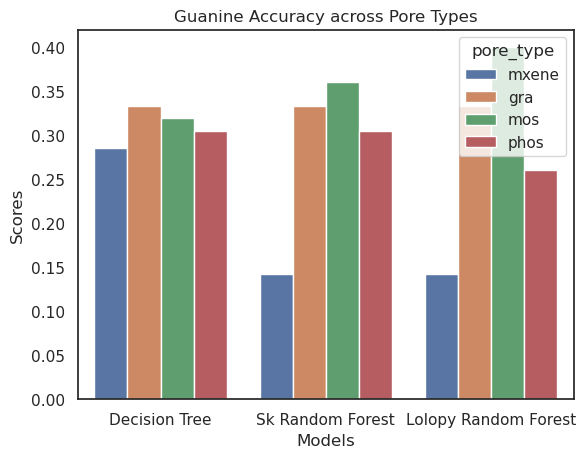

In [31]:
G_pos =all_data_df.index[all_data_df['Classes']=='G'].tolist()
G_df = all_data_df.iloc[G_pos,:]

# All models accuracy
sns.set(style='white')

# #create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='pore_type', data=G_df).set(title='Guanine Accuracy across Pore Types')

[Text(0.5, 1.0, 'Engineered Guanine Accuracy across Pore Types')]

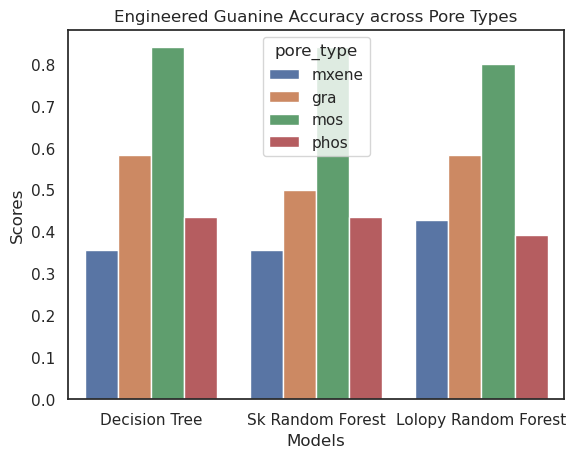

In [32]:
G_pos_e =all_data_df_e.index[all_data_df_e['Classes']=='G'].tolist()
G_df_e = all_data_df_e.iloc[G_pos_e,:]
# All models accuracy
sns.set(style='white')

# #create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='pore_type', data=G_df_e).set(title='Engineered Guanine Accuracy across Pore Types')

## Across T

[Text(0.5, 1.0, 'Thymine Accuracy across Pore Types')]

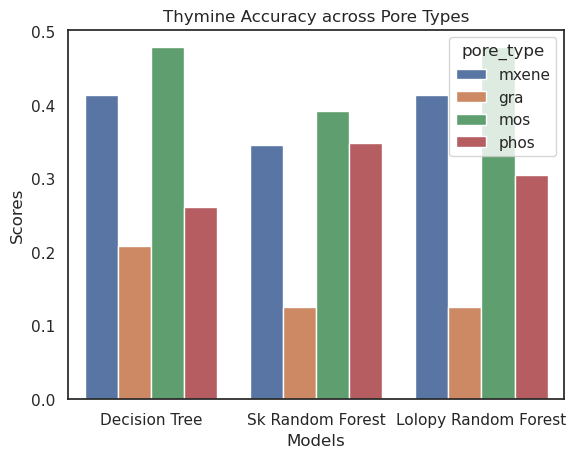

In [33]:
T_pos =all_data_df.index[all_data_df['Classes']=='T'].tolist()
T_df = all_data_df.iloc[T_pos,:]

# All models accuracy
sns.set(style='white')

# #create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='pore_type', data=T_df).set(title='Thymine Accuracy across Pore Types')

[Text(0.5, 1.0, 'Engineered Thymine Accuracy across Pore Types')]

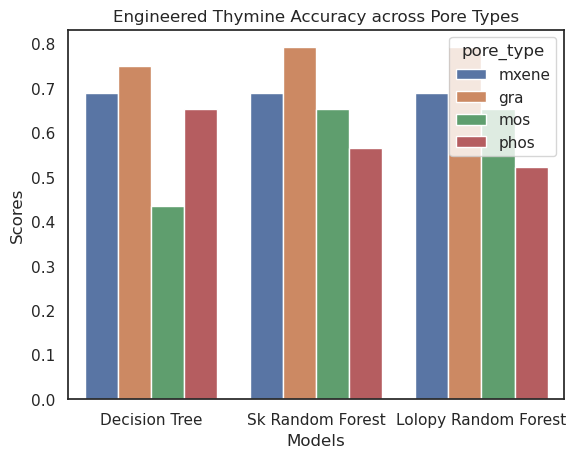

In [34]:
T_pos_e =all_data_df_e.index[all_data_df_e['Classes']=='T'].tolist()
T_df_e = all_data_df_e.iloc[T_pos_e,:]
# All models accuracy
sns.set(style='white')

# #create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='pore_type', data=T_df_e).set(title='Engineered Thymine Accuracy across Pore Types')

Je finis ce projet

# Adding Bandwith and Probability of Full Pass

In [35]:
phos_new =  pd.ExcelFile (r"/home/vazumah/AIML24787-Project/ML Final Project Data/Phos_band_data.xlsx") 

In [36]:
phos_new.sheet_names

['A', 'C', 'G', 'T']

In [37]:
for sheet in phos_new.sheet_names:
    my_vars[f'{sheet}_new'] = phos_new.parse(sheet)

In [38]:
X_new_df = np.concatenate((A_new, C_new,G_new,T_new), axis=0)

### Testing with both bandwidth and probability of full pass

In [39]:
Xphos_2 = np.concatenate((Xphos, X_new_df[:, 1:]), axis=1)
Xeng_phos_2 = np.concatenate((Xeng_phos, X_new_df[:, 1:]), axis=1)

In [40]:

pore2= 'phos'
phos_2_df = training_and_plots(Xphos_2,yphos, name=pore2)
phos_2_df_e = training_and_plots(Xeng_phos_2, yphos, name=pore2)
# my_vars[f'{pore}_df_p'] = training_and_plots(my_vars[f'X{pore}'],my_vars[f'dna_{pore}'], mode='binary', name=pore2)

[Text(0.5, 1.0, 'Phospherene Model Accuracy per Nucleotide')]

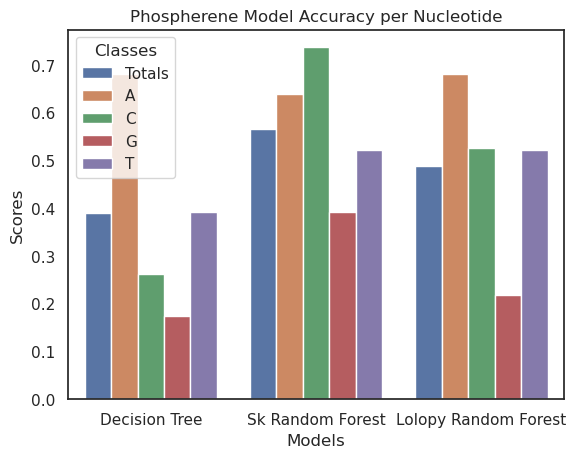

In [41]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=phos_2_df).set(title='Phospherene Model Accuracy per Nucleotide') 


[Text(0.5, 1.0, 'Phospherene Model Accuracy with Purine/Pyrimidine Type')]

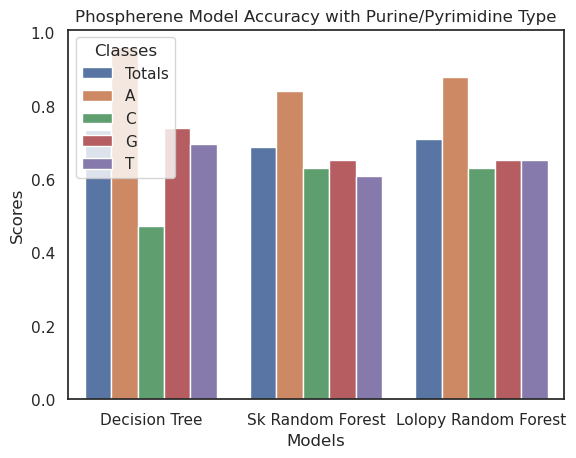

In [42]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=phos_2_df_e).set(title='Phospherene Model Accuracy with Purine/Pyrimidine Type') 
#classifying only purines and pyrimidines


### Testing with only bandwidth

In [43]:
Xphos_b = np.concatenate((Xphos, X_new_df[:, 1].reshape(-1,1)), axis=1)
Xeng_phos_b = np.concatenate((Xeng_phos, X_new_df[:,1].reshape(-1,1)), axis=1)


phos_b_df = training_and_plots(Xphos_b,yphos, name=pore2)
phos_b_df_e = training_and_plots(Xeng_phos_b, yphos, name=pore2)
# my_vars[f'{pore}_df_p'] = training_and_plots(my_vars[f'X{pore}'],my_vars[f'dna_{pore}'], mode='binary', name=pore2)

[Text(0.5, 1.0, 'Effect of Bandwidth feature on Phospherene')]

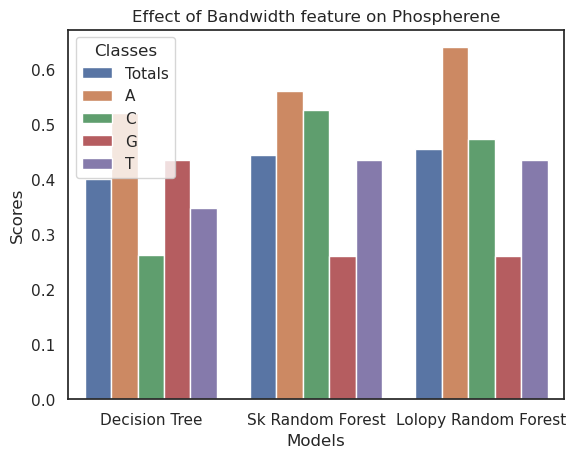

In [44]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=phos_b_df).set(title='Effect of Bandwidth feature on Phospherene') 


[Text(0.5, 1.0, 'Effect of Bandwidth feature on Engineered Phospherene')]

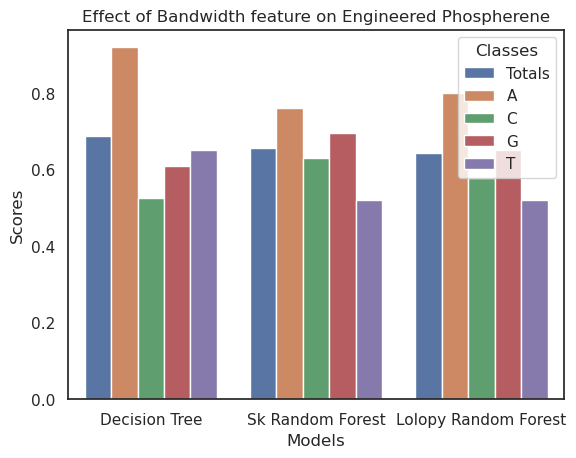

In [45]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=phos_b_df_e).set(title='Effect of Bandwidth feature on Engineered Phospherene') 
#classifying only purines and pyrimidines

### Testing with only probability of full pass

In [46]:
Xphos_f = np.concatenate((Xphos, X_new_df[:, 2].reshape(-1,1)), axis=1)
Xeng_phos_f = np.concatenate((Xeng_phos, X_new_df[:,2].reshape(-1,1)), axis=1)


phos_f_df = training_and_plots(Xphos_f,yphos, name=pore2)
phos_f_df_e = training_and_plots(Xeng_phos_f, yphos, name=pore2)
# my_vars[f'{pore}_df_p'] = training_and_plots(my_vars[f'X{pore}'],my_vars[f'dna_{pore}'], mode='binary', name=pore2)

[Text(0.5, 1.0, 'Effect of Full pass feature on Phospherene')]

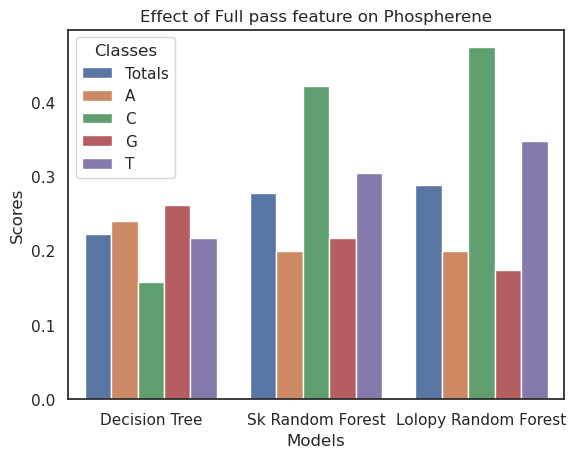

In [47]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=phos_f_df).set(title='Effect of Full pass feature on Phospherene') 


[Text(0.5, 1.0, 'Effect of Full pass feature on Engineered Phospherene')]

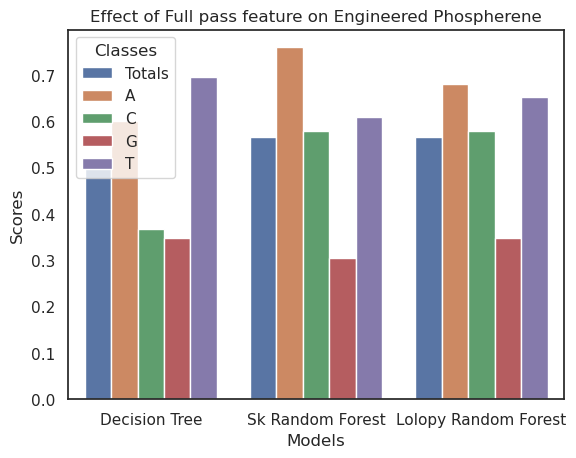

In [48]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=phos_f_df_e).set(title='Effect of Full pass feature on Engineered Phospherene') 
#classifying only purines and pyrimidines